<a href="https://colab.research.google.com/github/harikrish2727/mnist_dataset_prediction/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [11]:
random_image = x_train[0] 

In [12]:
random_image.shape

(28, 28)

In [13]:
random_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

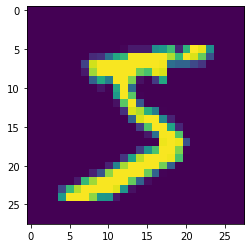

In [14]:
plt.imshow(random_image)

In [15]:
random_image.max()

255

In [16]:
random_image.min()

0

In [17]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Label Encoding**

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [21]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [22]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_cat_train.shape

(60000, 10)

**scaling the data**

In [24]:
x_train = x_train/255
x_test = x_test/255

In [35]:
x_train[0].max()

1.0

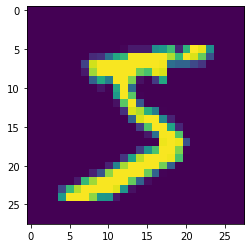

In [26]:
plt.imshow(x_train[0])

In [27]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [28]:
x_train.shape

(60000, 28, 28, 1)

In [36]:
y_cat_train.shape

(60000, 10)

**Modeling**

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [39]:
model = Sequential()

**convolution layer**

In [41]:
model.add(Conv2D(filters=32,kernel_size=(4,4),padding="same",input_shape=(28,28,1),activation="relu"))

**pooling layer**

In [42]:
model.add(MaxPool2D(pool_size=(2,2)))

**flattern layer**

In [43]:
model.add(Flatten())

**Dense layer**

In [44]:
model.add(Dense(100,activation="relu"))
model.add(Dense(25,activation="relu"))
#last layer
model.add(Dense(10,activation="softmax"))

#compile

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               627300    
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 630,629
Trainable params: 630,629
Non-trainable params: 0
__________________________________________________

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
stopping = EarlyStopping(patience=5,monitor="val_loss")

**Train model**

In [49]:
model.fit(x_train,y_cat_train,validation_data=(x_train,y_cat_train),callbacks=[stopping],epochs=25,batch_size=500)

Epoch 1/25
120/120 [==============================] - 32s 263ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 6.4618e-04 - val_accuracy: 1.0000
Epoch 2/25
120/120 [==============================] - 31s 262ms/step - loss: 8.5630e-04 - accuracy: 0.9999 - val_loss: 7.1615e-04 - val_accuracy: 0.9999
Epoch 3/25
120/120 [==============================] - 31s 263ms/step - loss: 6.8637e-04 - accuracy: 0.9999 - val_loss: 4.7682e-04 - val_accuracy: 1.0000
Epoch 4/25
120/120 [==============================] - 32s 263ms/step - loss: 4.1305e-04 - accuracy: 1.0000 - val_loss: 4.7097e-04 - val_accuracy: 0.9999
Epoch 5/25
120/120 [==============================] - 31s 262ms/step - loss: 7.3278e-04 - accuracy: 0.9999 - val_loss: 3.9996e-04 - val_accuracy: 1.0000
Epoch 6/25
120/120 [==============================] - 31s 262ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0065 - val_accuracy: 0.9979
Epoch 7/25
120/120 [==============================] - 31s 263ms/step - loss: 0.0124 - accuracy

In [51]:
losses = pd.DataFrame(model.history.history)

In [54]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.001043,0.999850,0.000646,0.999983
1,0.000856,0.999900,0.000716,0.999917
2,0.000686,0.999933,0.000477,1.000000
3,0.000413,1.000000,0.000471,0.999950
4,0.000733,0.999900,0.000400,0.999983


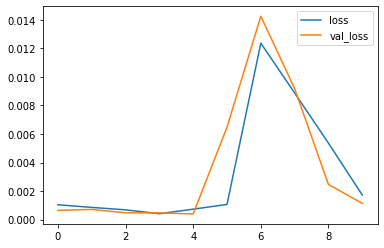

In [57]:
losses[["loss","val_loss"]].plot()

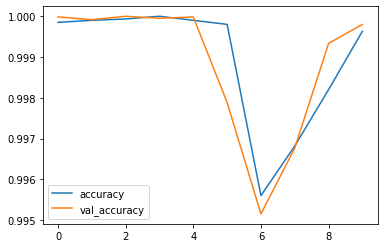

In [59]:
losses[["accuracy","val_accuracy"]].plot()

**evaluation**

In [60]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.048651982098817825, 0.9890000224113464]

**accuracy**

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
prediction = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [64]:
confusion_matrix(y_test,prediction)

array([[ 975,    1,    0,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1132,    1,    0,    0,    0,    1,    1,    0,    0],
       [   0,    3, 1020,    1,    1,    0,    1,    4,    1,    1],
       [   0,    0,    1, 1000,    0,    4,    0,    1,    2,    2],
       [   1,    1,    2,    0,  971,    0,    1,    0,    0,    6],
       [   2,    0,    0,    8,    0,  878,    3,    0,    0,    1],
       [   5,    1,    1,    2,    1,    0,  948,    0,    0,    0],
       [   0,    2,    5,    1,    1,    0,    0, 1014,    2,    3],
       [   5,    1,    5,    2,    0,    0,    2,    2,  952,    5],
       [   0,    0,    1,    0,    7,    0,    0,    0,    1, 1000]])

In [66]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

